# Redes Neurais Artificiais 2024.1


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [301]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable

### Abertura do Dataset

Primeiramente, precisamos baixar o _dataset_ para a pasta local, caso ainda não tenha sido feito (necessário em ambientes como o Google Colab):

In [302]:
if not os.path.isfile('autompg.csv'):
  !wget https://raw.githubusercontent.com/uea-geral/rna-mlp-experiments-exercise/main/autompg.csv

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [303]:
data = pd.read_csv('./autompg.csv', delimiter=";")

### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?

In [304]:
print(f"Há {len(data)} exemplos no conjunto de dados.")

Há 406 exemplos no conjunto de dados.


2. Quais os atributos existentes no dataset?

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   modelyear     406 non-null    float64
 7   origin        406 non-null    float64
 8   name          406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


3. Quais os nomes dos carros existentes no dataset?

In [306]:
names = data['name'].unique()
print(f"Nomes:\n")
print("\n".join(names))
print(f"\nCerca de {len(names)} nomes de carros diferentes.")

Nomes:

chevrolet chevelle malibu
buick skylark 320
plymouth satellite
amc rebel sst
ford torino
ford galaxie 500
chevrolet impala
plymouth fury iii
pontiac catalina
amc ambassador dpl
citroen ds-21 pallas
chevrolet chevelle concours (sw)
ford torino (sw)
plymouth satellite (sw)
amc rebel sst (sw)
dodge challenger se
plymouth 'cuda 340
ford mustang boss 302
chevrolet monte carlo
buick estate wagon (sw)
toyota corona mark ii
plymouth duster
amc hornet
ford maverick
datsun pl510
volkswagen 1131 deluxe sedan
peugeot 504
audi 100 ls
saab 99e
bmw 2002
amc gremlin
ford f250
chevy c20
dodge d200
hi 1200d
chevrolet vega 2300
toyota corona
ford pinto
volkswagen super beetle 117
plymouth satellite custom
ford torino 500
amc matador
pontiac catalina brougham
dodge monaco (sw)
ford country squire (sw)
pontiac safari (sw)
amc hornet sportabout (sw)
chevrolet vega (sw)
pontiac firebird
ford mustang
mercury capri 2000
opel 1900
peugeot 304
fiat 124b
toyota corolla 1200
datsun 1200
volkswagen model 11

4. Quais as características do 'chevrolet camaro'?

In [307]:
car_sample = data[data['name'] == 'chevrolet camaro']
car_sample

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [308]:
mpg_mean = data['mpg'].mean()
print(f"A média de consumo é {mpg_mean:.4f} milhas/galão")

A média de consumo é 23.5146 milhas/galão



Considerando que o **galão americano equivale aproximadamente 3,78 litros** e que **1 milha equivale aproximadamente 1,609 KM**, temos:

| Fonte: https://www.mpgtolitres.com/mpg-to-kml

In [309]:
def mpg_to_kmpl(mpg: float, decimals=2):
  return round(mpg * 0.425, decimals) # valor para conversão de MPG para KM/L

In [310]:
litres_mean = mpg_to_kmpl(mpg_mean)
print(f"Aplicando a conversão, a média de consumo é {litres_mean} KM/L")

Aplicando a conversão, a média de consumo é 9.99 KM/L


### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.

In [311]:
sanitized_data = data.dropna()
print(f"{len(data) - len(sanitized_data)} exemplos removidos.")

14 exemplos removidos.


2. Exclua a coluna com os nomes dos carros

In [312]:
if 'name' in sanitized_data:
  sanitized_data = sanitized_data.drop(columns=['name'])
print(f"Colunas remanescentes: {', '.join(sanitized_data.keys())}")

Colunas remanescentes: mpg, cylinders, displacement, horsepower, weight, acceleration, modelyear, origin


3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [313]:
if 'km/l' not in sanitized_data:
  sanitized_data['km/l'] = sanitized_data['mpg'].apply(mpg_to_kmpl)
  sanitized_data = sanitized_data.drop(columns=['mpg'])

sanitized_data.sample(4, random_state=0)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km/l
153,4.0,90.0,75.0,2125.0,14.5,74.0,1.0,11.90
289,4.0,140.0,88.0,2890.0,17.3,79.0,1.0,9.48
76,8.0,350.0,160.0,4456.0,13.5,72.0,1.0,5.10
386,4.0,105.0,63.0,2125.0,14.7,82.0,1.0,16.15


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X

In [314]:
X = sanitized_data.drop(columns=['km/l'])
Y = sanitized_data['km/l']

3. Efetue uma partição holdout 70/30 com o sklearn

In [315]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [316]:
from sklearn.linear_model import LinearRegression

In [317]:
lr_model = LinearRegression()

In [318]:
# Training...
lr_model.fit(X_train, Y_train)

LinearRegression()

### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [319]:
Y_predict_sample = lr_model.predict(X_test[2:3])
Y_true_sample = Y_test.iloc[2]

In [320]:
print(f"Valor predito: {Y_predict_sample[0]:.2f} KM/L")
print(f"Valor previsto: {Y_true_sample} KM/L")

Valor predito: 12.88 KM/L
Valor previsto: 13.6 KM/L


### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [321]:
from sklearn.metrics import r2_score

In [322]:
Y_predict = lr_model.predict(X_test)

In [323]:
def print_r2_score(y_true, y_predict):
  score = r2_score(y_true, y_predict)
  print("======== Métricas ==========")
  print(f"R2 Score: {score}")

In [324]:
print_r2_score(Y_test, Y_predict)

======== Métricas ==========
R2 Score: 0.8312579780256858


### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [325]:
residuos = []
for (x,y) in zip(Y_test,Y_predict):
    residuos.append((x-y)**2)
residuos

[0.6990906201708484,
 0.9490029943713353,
 0.5220911531088619,
 0.05992573247519677,
 32.911868347686074,
 2.9994766368064973,
 0.019264346689764587,
 0.009551804517243655,
 0.13999133297350708,
 0.014513613239374796,
 1.4257166337275855,
 2.3364504851318597,
 2.0816866390879256,
 0.7136909365039603,
 0.5973653197149701,
 2.5964005209039085,
 0.01876092250305292,
 0.8485366455484642,
 2.384224909395687,
 0.30254775656468125,
 1.1850101728991904,
 2.7438169630775806,
 0.7912559737221236,
 0.30591443089662856,
 2.2727398961227316,
 2.224863942866946,
 2.8741045571918615,
 0.05919277050717478,
 4.025623246598047,
 0.23419655241464007,
 0.27229847848789973,
 0.01209813031632809,
 1.888691430253401,
 5.33659761279915,
 0.14401553270708223,
 1.0231948186680309,
 1.6628015050600102,
 0.04691000273183324,
 0.2582318090550941,
 1.8376656294671199,
 1.6219159661613605,
 0.5731998381213179,
 0.015273823466600516,
 0.28143953544002837,
 0.2562318421570237,
 0.6111801057589601,
 0.09272662993823794

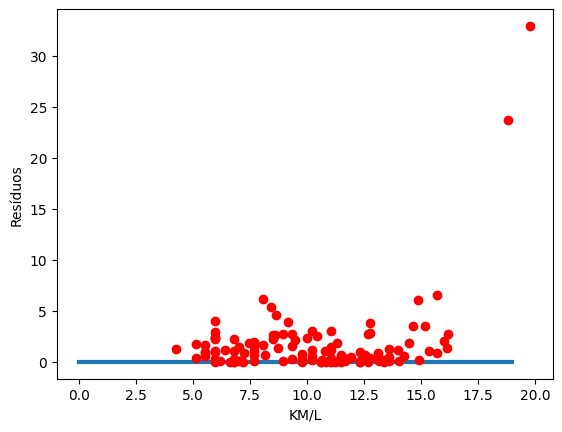

In [326]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x, y, linewidth=3)
plt.plot(Y_test, residuos,'ro')
plt.ylabel('Resíduos')
plt.xlabel('KM/L')
plt.show()

## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

In [327]:
X_train_std = X_train.copy()
X_test_std = X_test.copy()

# Aplicando a padronização para cada coluna
for column in X_train_std.columns:
  scale = StandardScaler().fit(X_train_std[[column]])
  X_train_std[column] = scale.transform(X_train_std[[column]])
  X_test_std[column] = scale.transform(X_test_std[[column]])

In [328]:
print("Antes da padronização:\n")
X_train.iloc[0]

Antes da padronização:



cylinders          4.0
displacement     121.0
horsepower       115.0
weight          2795.0
acceleration      15.7
modelyear         78.0
origin             2.0
Name: 283, dtype: float64

In [329]:
print("Depois da padronização:\n")
X_train_std.iloc[0]

Depois da padronização:



cylinders      -0.903576
displacement   -0.751447
horsepower      0.280461
weight         -0.252373
acceleration    0.118976
modelyear       0.514427
origin          0.568091
Name: 283, dtype: float64

### Antes de treinar...

Antes de prosseguir para a etapa de treinamento, podemos criar uma função que encapsula o processo de treinamento de uma rede MPL para este projeto:

In [330]:
from sklearn.neural_network import MLPRegressor

In [331]:
def fit_mlp_wrapper(x_train,
                      x_test,
                      y_train,
                      y_test,
                      activation = 'relu',
                      solver = 'adam',
                      n_layers=1,
                      n_neurons=10,
                      max_epochs = 300,
                      verbose=True):
  mlpr_network = MLPRegressor(max_iter=max_epochs,
                                hidden_layer_sizes=(n_neurons,n_layers),
                               activation=activation,
                               solver=solver,
                               verbose=verbose)
  # Treinando...
  mlpr_network.fit(x_train, y_train)

  # Calculando as métricas
  y_predict = mlpr_network.predict(x_test)
  print_r2_score(y_test, y_predict)
  return mlpr_network


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

In [332]:
mlpr_network_1 = fit_mlp_wrapper(X_train, X_test, Y_train, Y_test)

Iteration 1, loss = 43106.84975173
Iteration 2, loss = 41434.72751289
Iteration 3, loss = 39801.84184678
Iteration 4, loss = 38245.11589022
Iteration 5, loss = 36722.37253318
Iteration 6, loss = 35261.03204116
Iteration 7, loss = 33861.18934547
Iteration 8, loss = 32525.05412229
Iteration 9, loss = 31209.76169483
Iteration 10, loss = 29971.98644992
Iteration 11, loss = 28770.51833399
Iteration 12, loss = 27649.69092028
Iteration 13, loss = 26543.41611312
Iteration 14, loss = 25502.70250737
Iteration 15, loss = 24496.74938719
Iteration 16, loss = 23552.95072693
Iteration 17, loss = 22632.72105264
Iteration 18, loss = 21753.51045880
Iteration 19, loss = 20932.05416059
Iteration 20, loss = 20131.59327840
Iteration 21, loss = 19367.09063576
Iteration 22, loss = 18637.11884418
Iteration 23, loss = 17948.75042246
Iteration 24, loss = 17283.25456494
Iteration 25, loss = 16637.13074973
Iteration 26, loss = 16034.66409142
Iteration 27, loss = 15454.20305436
Iteration 28, loss = 14893.27623136
I

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

In [333]:
mlpr_network_2 = fit_mlp_wrapper(X_train, X_test, Y_train, Y_test, n_layers=2, n_neurons=20)

Iteration 1, loss = 36219.00903734
Iteration 2, loss = 29734.97546205
Iteration 3, loss = 24063.39309244
Iteration 4, loss = 19053.98140758
Iteration 5, loss = 14664.08737625
Iteration 6, loss = 10982.38725398
Iteration 7, loss = 7893.70530935
Iteration 8, loss = 5452.39637793
Iteration 9, loss = 3525.52475315
Iteration 10, loss = 2114.96904671
Iteration 11, loss = 1119.16553869
Iteration 12, loss = 494.03339392
Iteration 13, loss = 158.18750646
Iteration 14, loss = 68.51391542
Iteration 15, loss = 66.64886288
Iteration 16, loss = 66.64050228
Iteration 17, loss = 66.63315899
Iteration 18, loss = 66.62666152
Iteration 19, loss = 66.62093236
Iteration 20, loss = 66.61581138
Iteration 21, loss = 66.61109139
Iteration 22, loss = 66.60683656
Iteration 23, loss = 66.60288324
Iteration 24, loss = 66.59916704
Iteration 25, loss = 66.59569025
Iteration 26, loss = 66.59235326
Iteration 27, loss = 66.58916787
Iteration 28, loss = 66.58605949
Iteration 29, loss = 66.58303277
Iteration 30, loss = 6

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Para Discussão

- Qual melhor modelo para este problema?

In [334]:
table = PrettyTable()

linear_score = r2_score(Y_test, lr_model.predict(X_test))
mlpr_1_score = r2_score(Y_test, mlpr_network_1.predict(X_test))
mlpr_2_score = r2_score(Y_test, mlpr_network_2.predict(X_test))

table.field_names = ['Nome', 'R2 Score']
table.add_row(['LinearRegression', linear_score])
table.add_row(['MLPRegressor [n_layers = 1, n_neurons=10]', mlpr_1_score])
table.add_row(['MLPRegressor [n_layers = 2, n_neurons=20]', mlpr_2_score])

print(table)

+-------------------------------------------+---------------------+
|                    Nome                   |       R2 Score      |
+-------------------------------------------+---------------------+
|              LinearRegression             |  0.8312579780256858 |
| MLPRegressor [n_layers = 1, n_neurons=10] | -1.9171300307868786 |
| MLPRegressor [n_layers = 2, n_neurons=20] | -11.978011977513754 |
+-------------------------------------------+---------------------+


Comparando o $R^2$ _score_ das redes MLP com a pontuação do modelo de regressão linear, podemos notar que **o modelo de regressão linear acertou mais exemplos** do conjunto de testes, superando consideralmente os resultados das redes neurais MLP.

Uma explicação para esta considerável diferença de resultados está no fato de haver poucos exemplos no _dataset_ (um pouco menos de 400 exemplos após a etapa de pré-processamento), dificultando a convergência das redes MLP.

Além disso, a [documentação da função](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) `r2_score` da biblioteca `scikit-learn` ainda descreve que "a melhor pontuação possível é 1 e pode ser negativa (visto que o modelo pode ser arbitrariamente pior)", explicando o motivo das pontuações negativas obtidas nas previsões.